Dataset-1 has been used i.e. Travel dataset
Perform encoding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

In [3]:
##read the file
data=pd.read_csv("D:/INEURON_DATA/Dataset/data1/cleaned_travel.csv")
data

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [4]:
data.dtypes

ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [5]:
data.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [25]:
# to split the datasets
from sklearn.model_selection import train_test_split

# for one hot encoding with sklearn
from sklearn.preprocessing import OneHotEncoder

# for one hot encoding with feature-engine
from feature_engine.encoding import OneHotEncoder, OrdinalEncoder, CountFrequencyEncoder

In [15]:
# make a list of categorical variables
data_cat = [var for var in data.columns if data[var].dtype == 'O']
# make a list of numerical variables
data_num= [var for var in data.columns if data[var].dtype != 'O']

In [9]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['MonthlyIncome'], axis=1),  # predictors
    data['MonthlyIncome'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((3421, 18), (1467, 18))

# 1. one hot encoding
 to convert the categorical variables so that machine can understand them

In [10]:
# let's inspect the unique values of A4

X_train['ProductPitched'].unique()

array(['Basic', 'Deluxe', 'Standard', 'Super Deluxe', 'King'],
      dtype=object)

In [13]:
# let's one hot encode ProductPitched

tmp = pd.get_dummies(X_train['ProductPitched'], drop_first=False)

print(tmp.head())

      Basic  Deluxe  King  Standard  Super Deluxe
118       1       0     0         0             0
261       0       1     0         0             0
598       1       0     0         0             0
2154      0       0     0         1             0
905       0       0     0         0             1


In [16]:
# now let's encode all cateogrical variables together: train set

X_train_enc = pd.get_dummies(X_train[data_cat], drop_first=True)

print(X_train_enc.head())

      TypeofContact_Self Enquiry  Occupation_Large Business  \
118                            1                          0   
261                            0                          0   
598                            1                          0   
2154                           1                          0   
905                            1                          0   

      Occupation_Salaried  Occupation_Small Business  Gender_Male  \
118                     1                          0            0   
261                     1                          0            1   
598                     0                          1            1   
2154                    0                          1            1   
905                     1                          0            0   

      ProductPitched_Deluxe  ProductPitched_King  ProductPitched_Standard  \
118                       0                    0                        0   
261                       1                    0    

In [17]:
# # now let's encode all cateogrical variables together in the test set

X_test_enc = pd.get_dummies(X_test[data_cat], drop_first=True)

X_test_enc.head()

,TypeofContact_Self Enquiry,Occupation_Salaried,Occupation_Small Business,Gender_Male,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
751,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3314,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0
1220,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0
1362,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0
3289,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


# 2. Ordinal encoder one hot encoding

In [19]:
# let's create the encoder

ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=data_cat)

In [20]:
# let's fit the encoder to the train set

ordinal_enc.fit(X_train)

OrdinalEncoder(encoding_method='arbitrary',
               variables=['TypeofContact', 'Occupation', 'Gender',
                          'ProductPitched', 'MaritalStatus', 'Designation'])

In [21]:
# let's inspect which variables the encoder will encode

ordinal_enc.variables

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [22]:
# in the encoder dict we can observe the numbers
# assigned to each category for all the indicated variables

ordinal_enc.encoder_dict_

{'TypeofContact': {'Self Enquiry': 0, 'Company Invited': 1},
 'Occupation': {'Salaried': 0,
  'Small Business': 1,
  'Large Business': 2,
  'Free Lancer': 3},
 'Gender': {'Female': 0, 'Male': 1},
 'ProductPitched': {'Basic': 0,
  'Deluxe': 1,
  'Standard': 2,
  'Super Deluxe': 3,
  'King': 4},
 'MaritalStatus': {'Married': 0, 'Divorced': 1, 'Single': 2, 'Unmarried': 3},
 'Designation': {'Executive': 0,
  'Manager': 1,
  'Senior Manager': 2,
  'AVP': 3,
  'VP': 4}}

In [23]:
# let's transform the train and test sets

X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

In [24]:
# let's explore the result

X_train.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation
118,0,36.0,0,1,9.0,0,0,2,3.0,0,3.0,0,6.0,0,2,1,0.0,0
261,0,38.0,1,3,8.0,0,1,2,4.0,1,3.0,1,4.0,0,5,1,1.0,1
598,1,28.0,0,1,13.0,1,1,2,3.0,0,3.0,2,7.0,0,3,0,0.0,0
2154,0,40.0,0,3,16.0,1,1,3,4.0,2,4.0,0,3.0,0,4,0,0.0,2
905,0,29.0,0,1,6.0,0,0,2,4.0,3,3.0,0,4.0,0,2,0,1.0,3


# 3. CountFrequencyEncoder

In [29]:
##read the file again
data=pd.read_csv("D:/INEURON_DATA/Dataset/data1/cleaned_travel.csv")

In [30]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['MonthlyIncome'], axis=1),  # predictors
    data['MonthlyIncome'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((3421, 18), (1467, 18))

In [32]:
# let's create another encoder
count_enc = CountFrequencyEncoder(
    encoding_method='count', # to do frequency ==> encoding_method='frequency'
    variables=None) ## if variable =none then all the categorical variables will be encoded

In [38]:
# fit the encoder to the train set
count_enc.fit(X_train)

CountFrequencyEncoder()

In [43]:
# the encoder stores the variables it will encode
count_enc.encoder_dict_

{'TypeofContact': {'Self Enquiry': 2447, 'Company Invited': 974},
 'Occupation': {'Salaried': 1684,
  'Small Business': 1445,
  'Large Business': 290,
  'Free Lancer': 2},
 'Gender': {'Male': 2024, 'Female': 1397},
 'ProductPitched': {'Basic': 1302,
  'Deluxe': 1187,
  'Standard': 523,
  'Super Deluxe': 243,
  'King': 166},
 'MaritalStatus': {'Married': 1655,
  'Single': 649,
  'Divorced': 637,
  'Unmarried': 480},
 'Designation': {'Executive': 1302,
  'Manager': 1187,
  'Senior Manager': 523,
  'AVP': 243,
  'VP': 166}}

In [45]:
# let's transform train and test sets

X_train_enc=count_enc.transform(X_train)
X_test_enc=count_enc.transform(X_test)

In [46]:
# let's inspect the result

X_train_enc.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation
118,0,36.0,2447,1,9.0,1684,1397,2,3.0,1302,3.0,1655,6.0,0,2,1,0.0,1302
261,0,38.0,974,3,8.0,1684,2024,2,4.0,1187,3.0,637,4.0,0,5,1,1.0,1187
598,1,28.0,2447,1,13.0,1445,2024,2,3.0,1302,3.0,649,7.0,0,3,0,0.0,1302
2154,0,40.0,2447,3,16.0,1445,2024,3,4.0,523,4.0,1655,3.0,0,4,0,0.0,523
905,0,29.0,2447,1,6.0,1684,1397,2,4.0,243,3.0,1655,4.0,0,2,0,1.0,243


X_test_enc.head()

# 4. Frequency Encoding 
In place of 'count', 'frequency' can be used to encode using the frequency of the categorical variables.

# 5. Ordered integer encoding

In [48]:
##read the file again
data=pd.read_csv("D:/INEURON_DATA/Dataset/data1/cleaned_travel.csv")

In [49]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['MonthlyIncome'], axis=1),  # predictors
    data['MonthlyIncome'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((3421, 18), (1467, 18))

In [51]:
# let's create the encoder
ordinal_enc = OrdinalEncoder(
    encoding_method='ordered')

In [52]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

ordinal_enc.fit(X_train, y_train)

OrdinalEncoder()

In [55]:
# in the encoder dict we can observe the numbers that will
#replace each category in each variable

ordinal_enc.encoder_dict_

{'TypeofContact': {'Company Invited': 0, 'Self Enquiry': 1},
 'Occupation': {'Free Lancer': 0,
  'Large Business': 1,
  'Small Business': 2,
  'Salaried': 3},
 'Gender': {'Male': 0, 'Female': 1},
 'ProductPitched': {'Basic': 0,
  'Deluxe': 1,
  'Standard': 2,
  'Super Deluxe': 3,
  'King': 4},
 'MaritalStatus': {'Single': 0, 'Married': 1, 'Unmarried': 2, 'Divorced': 3},
 'Designation': {'Executive': 0,
  'Manager': 1,
  'Senior Manager': 2,
  'AVP': 3,
  'VP': 4}}

In [56]:
# let's transform train and test sets

X_train_enc = ordinal_enc.transform(X_train)
X_test_enc = ordinal_enc.transform(X_test)

In [57]:
X_train_enc.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation
118,0,36.0,1,1,9.0,3,1,2,3.0,0,3.0,1,6.0,0,2,1,0.0,0
261,0,38.0,0,3,8.0,3,0,2,4.0,1,3.0,3,4.0,0,5,1,1.0,1
598,1,28.0,1,1,13.0,2,0,2,3.0,0,3.0,0,7.0,0,3,0,0.0,0
2154,0,40.0,1,3,16.0,2,0,3,4.0,2,4.0,1,3.0,0,4,0,0.0,2
905,0,29.0,1,1,6.0,3,1,2,4.0,3,3.0,1,4.0,0,2,0,1.0,3


In [58]:
X_test_enc.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation
751,0,50.0,0,3,6.0,3,1,3,3.0,1,3.0,3,1.0,0,2,1,1.0,1
3314,0,36.0,1,3,24.0,3,0,4,4.0,1,5.0,3,5.0,1,3,1,2.0,1
1220,0,36.0,1,3,13.0,3,1,2,3.0,1,3.0,0,4.0,0,4,1,1.0,1
1362,0,45.0,0,1,6.0,2,0,2,3.0,1,3.0,0,5.0,0,1,1,1.0,1
3289,0,41.0,0,1,33.0,2,1,4,5.0,1,3.0,3,5.0,1,2,1,1.0,1


# Ordered integer encoding with pandas

In [65]:
##read the file again
#hr_imputed
data=pd.read_csv("D:/INEURON_DATA/Dataset/data0/hr_imputed.csv")
data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,Undefined,Pvt Ltd,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Small & Medium-org.,Pvt Ltd,5,47,0.0
2,city_21,0.624,Undefined,No relevent experience,Full time course,Graduate,STEM,5,Undefined,Pvt Ltd,0,83,0.0
3,city_115,0.789,Undefined,No relevent experience,no_enrollment,Graduate,Business Degree,0,Undefined,Pvt Ltd,0,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,Small & Medium-org.,Funded Startup,4,8,0.0


In [66]:
data.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [67]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,  # all data
    data['target'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((13410, 13), (5748, 13))

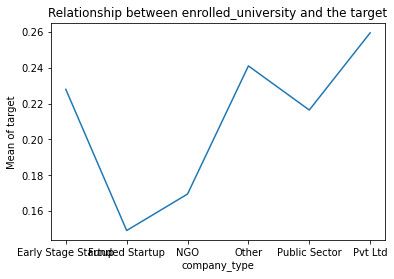

In [71]:
#Relationship between company_type and the target
X_train.groupby(['company_type'])['target'].mean().plot()
plt.title('Relationship between company_type and the target')
plt.ylabel('Mean of target')
plt.show()

In [72]:
# let's order the labels in 'company_type' according to the mean target value

X_train.groupby(['company_type'])['target'].mean().sort_values()

company_type
Funded Startup         0.149211
NGO                    0.169540
Public Sector          0.216374
Early Stage Startup    0.227907
Other                  0.240964
Pvt Ltd                0.259402
Name: target, dtype: float64

In [73]:
# let's we generate an ordered list with the labels of 'company_type'

ordered_labels = X_train.groupby(['company_type'])['target'].mean().sort_values().index

ordered_labels

Index(['Funded Startup', 'NGO', 'Public Sector', 'Early Stage Startup',
       'Other', 'Pvt Ltd'],
      dtype='object', name='company_type')

In [74]:
# next let's create a dictionary with the mappings of categories to numbers

ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}

ordinal_mapping

{'Funded Startup': 0,
 'NGO': 1,
 'Public Sector': 2,
 'Early Stage Startup': 3,
 'Other': 4,
 'Pvt Ltd': 5}

In [76]:
# replace the labels with the ordered numbers

X_train['company_type'] = X_train['company_type'].map(ordinal_mapping)
X_test['company_type'] = X_test['company_type'].map(ordinal_mapping)

In [78]:
# let's inspect the encoded variable
X_train['company_type'].head()

7559     2
6889     5
2617     5
9715     5
12748    5
Name: company_type, dtype: int64

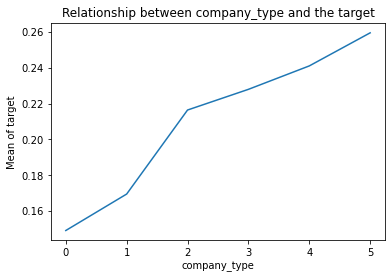

In [79]:
# let's explore the monotonic relationship

X_train.groupby(['company_type'])['target'].mean().plot()
plt.title('Relationship between company_type and the target')
plt.ylabel('Mean of target')
plt.show()

# 6. Mean Categorical Encoder

In [80]:
from feature_engine.encoding import MeanEncoder

In [81]:
##read the file again
#hr_imputed
data=pd.read_csv("D:/INEURON_DATA/Dataset/data0/hr_imputed.csv")
data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,Undefined,Pvt Ltd,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Small & Medium-org.,Pvt Ltd,5,47,0.0
2,city_21,0.624,Undefined,No relevent experience,Full time course,Graduate,STEM,5,Undefined,Pvt Ltd,0,83,0.0
3,city_115,0.789,Undefined,No relevent experience,no_enrollment,Graduate,Business Degree,0,Undefined,Pvt Ltd,0,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,Small & Medium-org.,Funded Startup,4,8,0.0


In [87]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('city', axis=1),  # all data
    data['target'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((13410, 12), (5748, 12))

In [88]:
# let's create the encoder

mean_enc = MeanEncoder(variables=None)

In [89]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

mean_enc.fit(X_train, y_train)

MeanEncoder()

In [90]:
# in the encoder dict we can observe the target mean per category
# per variable

mean_enc.encoder_dict_

{'gender': {'target': {'Female': 0.2570093457943925,
   'Male': 0.22652052439286482,
   'Other': 0.2803030303030303,
   'Undefined': 0.308408215661104}},
 'relevent_experience': {'target': {'Has relevent experience': 0.2136415465947963,
   'No relevent experience': 0.3361679511028435}},
 'enrolled_university': {'target': {'Full time course': 0.3849356548069644,
   'Part time course': 0.2496954933008526,
   'no_enrollment': 0.2115210616266211}},
 'education_level': {'target': {'Graduate': 0.27678783559040154,
   'High School': 0.1935483870967742,
   'Masters': 0.21498054474708173,
   'Phd': 0.11447811447811448,
   'Primary School': 0.13425925925925927}},
 'major_discipline': {'target': {'Arts': 0.21428571428571427,
   'Business Degree': 0.2555066079295154,
   'Humanities': 0.19279661016949154,
   'No Major': 0.21428571428571427,
   'Other': 0.27626459143968873,
   'STEM': 0.25037134840732794}},
 'company_size': {'target': {'Large-org.': 0.17747813411078717,
   'Small & Medium-org.': 0.1

In [91]:
X_train_enc.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation
118,0,36.0,1,1,9.0,3,1,2,3.0,0,3.0,1,6.0,0,2,1,0.0,0
261,0,38.0,0,3,8.0,3,0,2,4.0,1,3.0,3,4.0,0,5,1,1.0,1
598,1,28.0,1,1,13.0,2,0,2,3.0,0,3.0,0,7.0,0,3,0,0.0,0
2154,0,40.0,1,3,16.0,2,0,3,4.0,2,4.0,1,3.0,0,4,0,0.0,2
905,0,29.0,1,1,6.0,3,1,2,4.0,3,3.0,1,4.0,0,2,0,1.0,3


In [92]:
X_test_enc.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation
751,0,50.0,0,3,6.0,3,1,3,3.0,1,3.0,3,1.0,0,2,1,1.0,1
3314,0,36.0,1,3,24.0,3,0,4,4.0,1,5.0,3,5.0,1,3,1,2.0,1
1220,0,36.0,1,3,13.0,3,1,2,3.0,1,3.0,0,4.0,0,4,1,1.0,1
1362,0,45.0,0,1,6.0,2,0,2,3.0,1,3.0,0,5.0,0,1,1,1.0,1
3289,0,41.0,0,1,33.0,2,1,4,5.0,1,3.0,3,5.0,1,2,1,1.0,1


# 7. Weight of Evidence Encoder

In [95]:
from feature_engine.encoding import WoEEncoder

In [96]:
##read the file again
#hr_imputed
data=pd.read_csv("D:/INEURON_DATA/Dataset/data0/hr_imputed.csv")

In [109]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('target', axis=1),  # all data
    data['target'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((13410, 12), (5748, 12))

In [112]:
# create the weight of evidence encoder

woe_enc = WoEEncoder(variables=['enrolled_university','education_level', 'major_discipline' ])

In [113]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

woe_enc.fit(X_train, y_train)

WoEEncoder(variables=['enrolled_university', 'education_level',
                      'major_discipline'])

In [114]:
# the encoder stores the woe values per category per variable

woe_enc.encoder_dict_

{'enrolled_university': {'Full time course': 0.6405289298396596,
  'Part time course': 0.008942644159825713,
  'no_enrollment': -0.20660149080012855},
 'education_level': {'Graduate': 0.14872827557316196,
  'High School': -0.31793672708520837,
  'Masters': -0.18598133819725846,
  'Phd': -0.9366138790066656,
  'Primary School': -0.7546331583131751},
 'major_discipline': {'Arts': -0.19010335557532346,
  'Business Degree': 0.03972392417828321,
  'Humanities': -0.3227602400549133,
  'No Major': -0.19010335557532346,
  'Other': 0.14611283188305166,
  'STEM': 0.012546885237965988}}

In [115]:
# let's transform train and test sets

X_train_enc = woe_enc.transform(X_train)
X_test_enc = woe_enc.transform(X_test)

In [116]:
X_train_enc.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
7559,city_103,0.920,Female,Has relevent experience,-0.206601,-0.936614,0.012547,21,Large-org.,Public Sector,2,24
6889,city_65,0.802,Male,Has relevent experience,-0.206601,-0.185981,0.012547,21,Undefined,Pvt Ltd,1,145
2617,city_103,0.920,Male,Has relevent experience,-0.206601,0.148728,0.012547,21,Small & Medium-org.,Pvt Ltd,5,6
9715,city_103,0.920,Male,Has relevent experience,-0.206601,0.148728,0.012547,9,Large-org.,Pvt Ltd,0,28
12748,city_116,0.743,Male,Has relevent experience,-0.206601,-0.185981,0.012547,17,Undefined,Pvt Ltd,5,72


In [117]:
X_test_enc.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
12777,city_75,0.939,Male,Has relevent experience,-0.206601,0.148728,0.012547,17,Large-org.,Public Sector,5,57
7926,city_103,0.920,Male,Has relevent experience,-0.206601,-0.185981,0.012547,10,Large-org.,Pvt Ltd,4,129
13990,city_114,0.926,Male,Has relevent experience,-0.206601,0.148728,-0.190103,2,Small & Medium-org.,Early Stage Startup,2,48
14158,city_16,0.910,Other,Has relevent experience,-0.206601,0.148728,0.012547,11,Large-org.,Pvt Ltd,1,17
15652,city_28,0.939,Male,Has relevent experience,0.008943,0.148728,0.012547,8,Small & Medium-org.,Pvt Ltd,4,29


# 8. Rare Label Categorical Encoder

In [133]:
from feature_engine.encoding import RareLabelEncoder

In [134]:
##read the file again
#hr_imputed
data=pd.read_csv("D:/INEURON_DATA/Dataset/data0/hr_imputed.csv")
data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,Undefined,Pvt Ltd,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Small & Medium-org.,Pvt Ltd,5,47,0.0
2,city_21,0.624,Undefined,No relevent experience,Full time course,Graduate,STEM,5,Undefined,Pvt Ltd,0,83,0.0
3,city_115,0.789,Undefined,No relevent experience,no_enrollment,Graduate,Business Degree,0,Undefined,Pvt Ltd,0,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,Small & Medium-org.,Funded Startup,4,8,0.0


In [135]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['training_hours'], axis=1),  # predictors
    data['training_hours'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((13410, 12), (5748, 12))

In [147]:
# Rare category encoder

rare_enc = RareLabelEncoder(tol=0.05, variables=['enrolled_university','education_level', 'major_discipline'], n_categories=4)  

In [148]:
rare_enc.fit(X_train)

RareLabelEncoder(n_categories=4,
                 variables=['enrolled_university', 'education_level',
                            'major_discipline'])

In [149]:
rare_enc.encoder_dict_

{'enrolled_university': array(['no_enrollment', 'Full time course', 'Part time course'],
       dtype=object),
 'education_level': Index(['Graduate', 'Masters', 'High School'], dtype='object'),
 'major_discipline': Index(['STEM'], dtype='object')}

In [150]:
# fit and transform data
X_train = rare_enc.transform(X_train)
X_test = rare_enc.transform(X_test)

In [151]:
X_train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,target
7559,city_103,0.920,Female,Has relevent experience,no_enrollment,Rare,STEM,21,Large-org.,Public Sector,2,0.0
6889,city_65,0.802,Male,Has relevent experience,no_enrollment,Masters,STEM,21,Undefined,Pvt Ltd,1,1.0
2617,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,Small & Medium-org.,Pvt Ltd,5,0.0
9715,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,9,Large-org.,Pvt Ltd,0,0.0
12748,city_116,0.743,Male,Has relevent experience,no_enrollment,Masters,STEM,17,Undefined,Pvt Ltd,5,0.0


In [152]:
X_test.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,target
12777,city_75,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,Large-org.,Public Sector,5,1.0
7926,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,10,Large-org.,Pvt Ltd,4,0.0
13990,city_114,0.926,Male,Has relevent experience,no_enrollment,Graduate,Rare,2,Small & Medium-org.,Early Stage Startup,2,0.0
14158,city_16,0.910,Other,Has relevent experience,no_enrollment,Graduate,STEM,11,Large-org.,Pvt Ltd,1,0.0
15652,city_28,0.939,Male,Has relevent experience,Part time course,Graduate,STEM,8,Small & Medium-org.,Pvt Ltd,4,0.0


# 9. Binary encoding

In [161]:
pip install category-encoders

Note: you may need to restart the kernel to use updated packages.


In [162]:
from category_encoders import BinaryEncoder

In [173]:
##read the file again
#hr_imputed
data=pd.read_csv("D:/INEURON_DATA/Dataset/data0/hr_imputed.csv")


In [174]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['training_hours'], axis=1),  # predictors
    data['training_hours'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((13410, 12), (5748, 12))

In [175]:
X_train['company_size'].nunique()

3

In [177]:
# create the binary encoder

encoder = BinaryEncoder(cols=['company_size'], drop_invariant=True)
encoder.fit(X_train)

BinaryEncoder(cols=['company_size'], drop_invariant=True,
              mapping=[{'col': 'company_size',
                        'mapping':     company_size_0  company_size_1
 1               0               1
 2               1               0
 3               1               1
-1               0               0
-2               0               0}])

In [178]:
# let's transform train and test sets

X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [171]:
X_train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size_0,company_size_1,company_type,last_new_job,target
7559,city_103,0.920,Female,Has relevent experience,no_enrollment,Phd,STEM,21,0,1,Public Sector,2,0.0
6889,city_65,0.802,Male,Has relevent experience,no_enrollment,Masters,STEM,21,1,0,Pvt Ltd,1,1.0
2617,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,1,1,Pvt Ltd,5,0.0
9715,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,9,0,1,Pvt Ltd,0,0.0
12748,city_116,0.743,Male,Has relevent experience,no_enrollment,Masters,STEM,17,1,0,Pvt Ltd,5,0.0


# 10. HashingEncoder

In [180]:
from category_encoders import HashingEncoder

In [181]:
##read the file again
#hr_imputed
data=pd.read_csv("D:/INEURON_DATA/Dataset/data0/hr_imputed.csv")

In [182]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['training_hours'], axis=1),  # predictors
    data['training_hours'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((13410, 12), (5748, 12))

In [184]:
X_train['major_discipline'].unique()

array(['STEM', 'Other', 'No Major', 'Humanities', 'Business Degree',
       'Arts'], dtype=object)

In [185]:
# create the feature hashing encoder

encoder = HashingEncoder(cols=['major_discipline'], n_components=4)

In [186]:
# fit the transformer to the train set

encoder.fit(X_train)

HashingEncoder(cols=['major_discipline'], max_process=2, max_sample=6705,
               n_components=4)

In [187]:
# let's inspect the hashing method

encoder.hash_method

'md5'

In [188]:
# let's transform train and test sets

X_train_enc = encoder.transform(X_train)
X_test_enc = encoder.transform(X_test)

In [190]:
X_train_enc.head()

,col_0,col_1,col_2,col_3,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,target
7559,0,0,1,0,city_103,0.920,Female,Has relevent experience,no_enrollment,Phd,21,Large-org.,Public Sector,2,0.0
6889,0,0,1,0,city_65,0.802,Male,Has relevent experience,no_enrollment,Masters,21,Undefined,Pvt Ltd,1,1.0
2617,0,0,1,0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,21,Small & Medium-org.,Pvt Ltd,5,0.0
9715,0,0,1,0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,9,Large-org.,Pvt Ltd,0,0.0
12748,0,0,1,0,city_116,0.743,Male,Has relevent experience,no_enrollment,Masters,17,Undefined,Pvt Ltd,5,0.0


In [189]:
X_test_enc.head()

,col_0,col_1,col_2,col_3,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,target
12777,0,0,1,0,city_75,0.939,Male,Has relevent experience,no_enrollment,Graduate,17,Large-org.,Public Sector,5,1.0
7926,0,0,1,0,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,10,Large-org.,Pvt Ltd,4,0.0
13990,1,0,0,0,city_114,0.926,Male,Has relevent experience,no_enrollment,Graduate,2,Small & Medium-org.,Early Stage Startup,2,0.0
14158,0,0,1,0,city_16,0.910,Other,Has relevent experience,no_enrollment,Graduate,11,Large-org.,Pvt Ltd,1,0.0
15652,0,0,1,0,city_28,0.939,Male,Has relevent experience,Part time course,Graduate,8,Small & Medium-org.,Pvt Ltd,4,0.0
